### Використовуючи датасет з файлу Position_Salaries.csv, побудуйте модель поліноміальної регрессії.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [33]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [34]:
X = dataset[['Level']].values
y = dataset[['Salary']].values

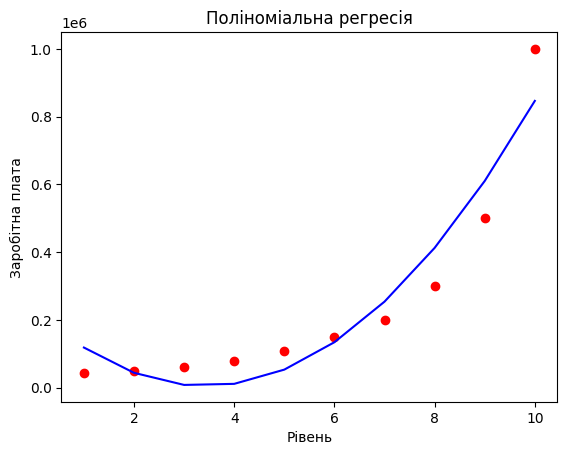

In [35]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Поліноміальна регресія')
plt.xlabel('Рівень')
plt.ylabel('Заробітна плата')
plt.show()

--------------

### Використовуючи датасет з файлу communities.csv, виконайте нормалізацію даних. Визначте найкращий метод нормалізації для даного набору даних.

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [48]:
dataset = pd.read_csv('communities.csv')
dataset.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


In [49]:
data.replace("?", np.nan, inplace=True)
data.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.0,NaN,0.67
1,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
4,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.14


In [51]:
corr_matrix = data.corr()
corr_matrix

C:\Users\Work\AppData\Local\Temp\ipykernel_25528\2141490353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,8,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,...,0.12.1,0.42,0.5.1,0.51.1,0.64,0.12.2,0.26.1,0.2.1,0.32.2,0.2.2
8,1.000000,-0.003851,-0.078962,-0.050049,-0.046576,0.214475,-0.318834,-0.210856,0.100326,0.036860,...,-0.356569,0.340235,0.151794,0.061749,0.127630,-0.040052,-0.137911,-0.021334,-0.074756,-0.211587
1,-0.003851,1.000000,-0.006739,0.034876,0.003032,-0.003968,-0.001445,0.001003,-0.000578,0.006954,...,-0.000520,-0.026151,-0.022121,-0.035683,-0.028000,0.018251,-0.012473,-0.000410,-0.023061,-0.032725
0.19,-0.078962,-0.006739,1.000000,-0.045742,0.231594,-0.301269,0.181738,0.156202,0.006654,0.130468,...,0.173003,-0.124710,-0.123624,0.001914,-0.089632,0.713630,0.231892,0.270344,0.466091,0.367346
0.33,-0.050049,0.034876,-0.045742,1.000000,-0.067385,-0.235722,0.201965,0.468785,0.520365,0.367334,...,0.311003,-0.049650,-0.057931,-0.103373,-0.003301,-0.014877,-0.004018,-0.051446,-0.094019,-0.034995
0.02,-0.046576,0.003032,0.231594,-0.067385,1.000000,-0.794350,-0.106800,-0.066552,0.122188,0.153438,...,-0.098258,0.093231,-0.045712,0.056185,-0.002913,0.149941,0.095105,0.147092,0.261174,0.631279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.12.2,-0.040052,0.018251,0.713630,-0.014877,0.149941,-0.131560,-0.001044,0.011607,0.025875,0.062522,...,-0.048747,-0.069060,-0.116861,-0.062853,-0.104396,1.000000,-0.170901,0.007658,0.299481,0.196855
0.26.1,-0.137911,-0.012473,0.231892,-0.004018,0.095105,-0.337530,0.389959,0.370099,-0.095720,0.119737,...,0.614829,-0.221328,0.020715,0.118132,-0.012162,-0.170901,1.000000,0.587800,0.228073,0.281404
0.2.1,-0.021334,-0.000410,0.270344,-0.051446,0.147092,-0.215707,0.296938,0.078357,-0.173248,-0.023493,...,0.401766,-0.175421,0.192386,0.081317,-0.042420,0.007658,0.587800,1.000000,0.206612,0.153845
0.32.2,-0.074756,-0.023061,0.466091,-0.094019,0.261174,-0.276603,0.101987,0.125329,0.001558,0.117396,...,0.171186,-0.133852,-0.090179,0.008504,-0.107286,0.299481,0.228073,0.206612,1.000000,0.348784


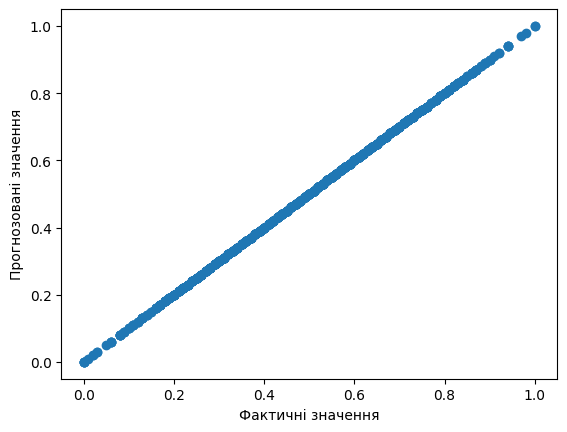

In [52]:
target_col = corr_matrix.iloc[:, :-1].corrwith(corr_matrix.iloc[:, -1]).abs().idxmin()
y = data[target_col]

numeric_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
new_data = data[numeric_cols].copy()

scaler = Normalizer()
normalized_data = scaler.fit_transform(new_data)
df_normalized_data = pd.DataFrame(normalized_data, columns=numeric_cols)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_normalized_data)

regressor = LinearRegression()
regressor.fit(X_poly, y)

y_pred = regressor.predict(X_poly)

plt.scatter(y, y_pred)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.show()
